In [1]:
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
import seaborn as sns
iris = sns.load_dataset("iris")

In [26]:
##### 2절 | R을 이용한 표본 추출

##### 1. 단순 임의 추출
## Q) iris 데이터로 분석을 진행하기 위해 전체 데이터의 7:3의 비율로
## training data와 test data를 추출한 뒤 새로운 변수에 저장해보자. 
## (데이터 추출 방법은 단순 임의 비복원 추출을 이용한다.)

105

In [70]:
# iris 데이터 행의 개수에서 70%에 해당하는 행번호를 랜덤으로 추출
iris.sample(n=int((len(iris))*0.7))
#df.sample(n= 3, random_state=1004) or df.sample(frac = 0.7, random_state=1004)

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,setosa
48,5.3,3.7,1.5,0.2,setosa
82,5.8,2.7,3.9,1.2,versicolor
27,5.2,3.5,1.5,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
...,...,...,...,...,...
130,7.4,2.8,6.1,1.9,virginica
109,7.2,3.6,6.1,2.5,virginica
6,4.6,3.4,1.4,0.3,setosa
148,6.2,3.4,5.4,2.3,virginica


In [71]:
# 추출한 행번호를 이용하여 training 데이터와 test 데이터 생성
training = iris.sample(n=int((len(iris))*0.7)) #iris.iloc[B,:]
B = list(training.index)
test = iris.drop(B) #iris.iloc[LIST,:]

A = list(iris.index)
B = list(training.index)
LIST = [x for x in A if x not in B]

In [96]:
# 데이터의 개수 확인
print(training.shape[0])
print(test.shape[0])

105
45


In [ ]:
##### 2. 층화 임의 추출
## Q) iris 데이터에서 Species가 setosa인 데이터를 20개, versicolor인 데이터를 15개, 
## versinica인 데이터를 15개씩 단순 임의 추출을 사용해 추출해보자.

In [106]:
# 층화임의추출을 수행한 뒤 sample 변수에 저장
dfA = iris.loc[iris.species=='setosa'].sample(n=20)
dfB = iris.loc[iris.species=='versicolor'].sample(n=15)
dfC = iris.loc[iris.species=='virginica'].sample(n=15)

In [116]:
RandomSampling = pd.concat([dfA,dfB,dfC]).sort_index()
RandomSampling.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa


In [117]:
# 추출된 데이터를 iris_sample 변수에 저장
iris_sample = RandomSampling

In [119]:
# 표본 데이터의 Species 변수에 대한 도수분포표 생성
iris_sample.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.720000,3.070000,3.536000,1.090000
std,0.888934,0.463461,1.862165,0.780698
min,4.400000,2.300000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.600000,3.000000,4.000000,1.250000
75%,6.300000,3.275000,5.050000,1.675000
max,7.900000,4.400000,6.700000,2.500000


In [ ]:
##===============================================================
##### 2장. T-검정(T-Test)


##### 1절 | 일표본 T-검정(One Sample T-Test)
## Q) MASS패키지의 cats 데이터는 고양이들의 성별(Sex 변수), 
## 몸무게(Bwt 변수), 심장의 무게(Hwt 변수)를 담고있다. 
## cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지에 대한
## 통계적 검정을 수행하고, 결과를 해석해보자.

In [4]:
cats = pd.read_csv("C:\\Users\\채현경\\Desktop\\ADP 실습\\cats.csv")
cats.drop(cats.columns[0],axis=1,inplace=True)

In [2]:
import scipy
from scipy.stats import shapiro

In [143]:
print(shapiro(cats.Bwt))
#p-value가 0.05보다 커야 정규성 충족

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)


In [5]:
## 2) cats 데이터에 대한 일표본 T-검정 수행
# 일표본 T-검정 수행
from scipy.stats import ttest_1samp
print(ttest_1samp(cats["Bwt"],2.6))
#p-value는 0.05보다 커 귀무가설 채택. 평균과 차이가 없다
#얘는 0.05보다 작기때문에 평균과 차이가 있다

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)


In [ ]:
##### 2절 | 대응표본 T-검정(Paired Sample T-Test)

## Q) 10명의 환자를 대상으로 수면영양제를 복용하기 전과 후의 수면시간을 측정하여 
## 영양제의 효과가 있는지를 판단하고자 한다. 
## 영양제 복용 전과 후의 평균 수면시간에 차이가 있는지를 알아보는데, 
## 단측검정을 수행하여 영양제 복용 후에 수면시간이 더 늘어났는지를 검정해보자. 
## 수면영양제를 복용하기 전과 후의 수면시간은 아래에 제시된 바와 같다. 
## (표본이 정규성을 만족한다는 가정 하에 단측검정 수행, 유의수준 = 0.05)

In [7]:
dict = {'before':[7, 3, 4, 5, 2, 1, 6, 6, 5, 4],'after':[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
data = pd.DataFrame(dict)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [11]:
shapiro(data.before)

ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574)

In [12]:
shapiro(data.after) #0.05를 넘어서 정규성임

ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687)

In [14]:
#대응표본 t-test
from scipy.stats import ttest_rel

ttest_rel(data.before,data.after) #0.05보다 작아서 p-value 기각함

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

In [ ]:
##### 3절 | 독립표본 T-검정( Sample T-Test)

## Q) MASS패키지의 cats 데이터는 고양이들의 성별(Sex 변수), 몸무게(Bwt 변수), 
## 심장의 무게(Hwt 변수)를 담고있다. 고양이들의 성별(Sex)에 따른 몸무게(Bwt)의 평균은 
## 통계적으로 다르다고 할 수 있는지에 대한 검정을 수행하고, 결과를 해석해보자. 

## 검정을 수행하기에 앞서 설정할 수 있는 가설은 아래와 같다.
## 귀무가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 없다.
## 대립가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 있다.

In [22]:
#등분산성 확인하기
from scipy.stats import levene
levene(cats.Bwt.loc[cats['Sex']=='F'],cats.Bwt.loc[cats['Sex']=='M']) #P-VALUE가 0.05보다 작아서 등분산성이 없음

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [25]:
from scipy.stats import ttest_ind
# ttest_ind(A_group, B_group)

ttest_ind(cats.Bwt.loc[cats['Sex']=='F'],cats.Bwt.loc[cats['Sex']=='M'])
#P-VALUE가 0.5보다 작아서 두개간의 차이 있음

Ttest_indResult(statistic=-7.330666826537409, pvalue=1.590445378625505e-11)

In [ ]:
##===============================================================
##### 3장. 교차분석


##### 2절 | 적합성 검정
## Q) MASS 패키지의 survey 데이터에서 W.Hnd 변수는 설문 응답자가 
## 왼손잡이(Left) 인지 오른손잡이(Right) 인지를 나타낸다. 
## R을 이용하여 W.Hnd 변수에 대한 분할표를 생성하고, 아래와 같은 가설에 대한 적합도 검정을 수행해보자.

## 귀무가설 : 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%이다.
## 대립가설 : 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%라고 할 수 없다.

In [28]:
survey = pd.read_csv("C:\\Users\\채현경\\Desktop\\ADP 실습\\survey.csv")
survey.drop(survey.columns[0],axis=1,inplace=True)

In [29]:
survey

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667
...,...,...,...,...,...,...,...,...,...,...,...,...
232,Female,18.0,18.0,Right,L on R,85.0,Right,Some,Never,165.1,Imperial,17.667
233,Female,18.5,18.0,Right,L on R,88.0,Right,Some,Never,160.0,Metric,16.917
234,Female,17.5,16.5,Right,R on L,NaN,Right,Some,Never,170.0,Metric,18.583
235,Male,21.0,21.5,Right,R on L,90.0,Right,Some,Never,183.0,Metric,17.167


In [48]:
x = survey['W.Hnd']
X = pd.DataFrame(x)

In [63]:
from scipy.stats import chisquare
chisquare(X,f_exp = [189.6,47.4])

ValueError: could not convert string to float: 'Right'

In [ ]:
##### 3절 | 독립성 검정
## Q) MASS 패키지의 survey 데이터에서 Exer 변수는 설문 응답자가 
## 얼마나 자주 운동을 하는지에 대해 Freq(자주), Some(약간), None(하지 않음)의 범주로 
## 값을 저장하고 있다. W.Hnd 변수는 설문 응답자가 왼손잡이인지 오른손 잡이인지에 대해 
## Left(왼손잡이), Right(오른손 잡이)의 두 가지 범주로 값을 가지고 있다. 
## 주로 사용하는 손과 운동의 빈도가 서로 독립인지를 확인하기 위해 분할표를 생성하고, 
## 아래의 가설에 대한 독립성 검정을 수행해보자.

## 귀무가설 : W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이다.
## 대립가설 : W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이 아니다.

In [ ]:
##===============================================================
##### 4장. 분산분석 (ANOVA)


##### 1절 | 일원배치 분산분석
## Q) R에 내장되어 있는 iris 데이터를 이용하여 종(Species)별로 
## 꽃받침의 폭(Sepal.Width)의 평균이 같은지 
## 혹은 차이가 있는지를 확인하기 위해 일원배치 분산분석을 수행해보자.

In [2]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc

In [7]:
fit = ols(formula='sepal_width ~ species', data=iris).fit()
anova_lm(fit)
#F의 P-value가 0.05 이하로 어떠한 집단이 다르다는 걸 알 수 있음
#어떤 집단이 다른건지 사후 분석 진행 필요

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


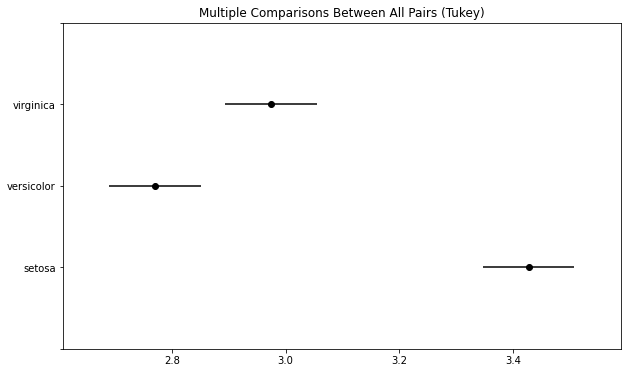

In [12]:
comp = mc.MultiComparison(iris['sepal_width'], iris['species'])
tukeyhsd = comp.tukeyhsd(alpha=0.05)
tukeyhsd.summary()
print(tukeyhsd)
fig = tukeyhsd.plot_simultaneous()

In [ ]:
##### 2절 | 이원배치 분산분석

## Q1) R에 내장된 mtcars 데이터는 32개의 차종에 대한 다양한 특성과 단위 연료당 주행거리를 담고 있다. 
## am변수는 변속기 종류이며, cyl변수는 실린더의 개수를 의미한다. 
## 데이터를 분석에 적절한 형태로 전처리한 후, 변속기 종류(am변수)와 실린더의 개수(cyl변수)에 따라 
## 주행거리(mpg변수) 평균에 유의미한 차이가 존재하는지 이원 분산분석을 수행하고, 그 결과를 해석해보자.

In [20]:
cars = pd.read_csv("C:\\Users\\채현경\\Downloads\\mtcars.csv")

In [27]:
fit = ols(formula='mpg ~ C(am) * C(cyl)', data=cars).fit()
anova_lm(fit)

#세번째거는 0.05보다 작으므로 어느 정도 교호작용이 일어남

,df,sum_sq,mean_sq,F,PR(>F)
C(am),1.0,405.150588,405.150588,44.064051,4.846803e-07
C(cyl),2.0,456.400921,228.200461,24.819011,9.354735e-07
C(am):C(cyl),2.0,25.436511,12.718256,1.383233,2.686140e-01
Residual,26.0,239.059167,9.194583,NaN,NaN


In [ ]:
## Q2) 실린더 개수(cyl변수)와 변속기 종류(am변수) 사이에 상호작용 효과가 있는지 없는지를 
## 시각화해주는 상호작용 그래프를 그린 후 이를 해석해보자.

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

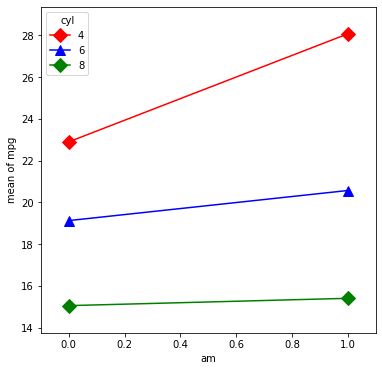

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cars['am'], cars['cyl'], cars['mpg'],
                       colors=['red', 'blue','green'], markers=['D', '^','D'], ms=10, ax=ax)

In [38]:
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
##===============================================================
##### 5장. 상관분석

#https://junsik-hwang.tistory.com/38

##### 3절 | 상관계수 검정

## Q1) airquality 데이터는 뉴욕의 일일 대기 오염 정도에 대한 데이터로, 총6개의 변수로 이루어져 있다. 
## 6개의 변수 중 Month(월)과 Day(일)은 제외하고 Ozone(오존량), Solar.R(일사량), Wind(풍속), Temp(최고온도)만으로
## 이루어진 데이터프레임 air를 생성하고, 네 가지 변수에 대한 상관계수를 산출해보자. 
## 단, 모든 변수값에 NA가 없는 데이터들만 이용하여 피어슨, 스피어만, 켄달 상관계수를 모두 산출하여라.

In [2]:
airquality = pd.read_csv("C:\\Users\\채현경\\Desktop\\airquality.csv")
airquality.drop(airquality.columns[0], axis=1,inplace=True)

In [7]:
air = airquality[['Ozone','Solar.R','Wind','Temp']]

In [8]:
air.dropna()

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


In [9]:
#하기 전에 shapiro 로 정규성 검정해야댐
#피어슨 상관관계
import scipy.stats as stats
stats.pearsonr(x=air.dropna()['Ozone'], y=air.dropna()['Solar.R'])

(0.34834169299360274, 0.00017931085716488528)

In [58]:
#스피어만 상관관계
stats.spearmanr(a=air.dropna()['Ozone'], b=air.dropna()['Solar.R'])

SpearmanrResult(correlation=0.34818646995676306, pvalue=0.00018058849678407788)

In [59]:
#켄달 상관관계
stats.kendalltau(x=air.dropna()['Ozone'], y=air.dropna()['Solar.R'])

KendalltauResult(correlation=0.24031942144921253, pvalue=0.00020762057076207236)

In [ ]:
## Q3) air데이터의 Ozone(오존량)와 Wind(풍속)변수에 대한 상관분석을 실시하고, 
## 피어슨 상관계수에 대한 검정 결과를 해석해보자. 

In [11]:
stats.spearmanr(a=airquality.dropna()['Ozone'], b =airquality.dropna()['Wind'])
#상관계수가 -0.6051로 음의 강한 상관관계

SpearmanrResult(correlation=-0.6051364235807455, pvalue=1.9980823502834718e-12)

In [23]:
##===============================================================
##### 6장. 회귀분석


##### 2절 | 단순선형회귀분석

##### 3. R을 이용한 단순선형회귀분석 
## Q)  MASS패키지에서 제공하는 Cars93 데이터의 엔진크기(EngineSize)를 독립변수, 
## 가격(Price)를 종속변수로 설정하여 단순 선형 회귀분석을 실시한 후 추정된 회귀모형에 대해 해석해보자.
Cars93 = pd.read_csv("C:\\Users\\채현경\\Downloads\\Cars93.csv")


In [76]:
from sklearn.linear_model import LinearRegression
x = Cars93['Price']
y = Cars93['EngineSize']

In [78]:
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1),y)
#해석 
print(line_fitter.coef_) #기울기
print(line_fitter.intercept_) #절편

[0.06415979]
1.4160050635716037


In [81]:
y_predicted = line_fitter.predict([[70]])
print(mlr.score(pd.DataFrame(x),y)) #R2

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

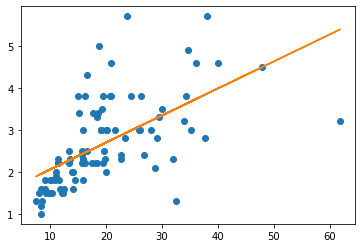

In [40]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

In [48]:
##### 3절 | 다중선형회귀분석

##### 3. 더미변수(dummy variable)
## Q)  R에서 회귀모형을 생성하는 lm함수는 데이터에 범주형 변수가 포함되어 있을 경우, 
## 이를 자동으로 더미변수로 변환하여 회귀모형을 생성한다. 
## 이 과정을 더 자세히 이해하기 위해 범주형 변수(Spceies)가 포함된 iris데이터에서 
## Petal.Length를 종속변수로 두고 나머지 변수들을 독립변수로 설정한 회귀모형을 생성하고 그 결과를 살펴보자.

In [59]:
y = iris['petal_length']
x = iris[['sepal_length', 'sepal_width', 'petal_width']]

In [53]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size =0.8, test_size =0.2)

In [65]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [66]:
y_predict = mlr.predict(x_test)

0.9664869116566281


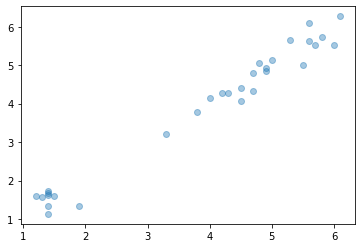

In [68]:
plt.scatter(y_test, y_predict,alpha =0.4)
print(mlr.score(x_train,y_train)) #R2

In [75]:
##### 5. 최적회귀방정식의 선택

## Q1) MASS 패키지의 Cars93 데이터에서 엔진크기(EngineSize), RPM(RPM), 너비(Width), 
## 길이(Length)를 독립변수로 가지고, 자동차의 가격(Price)을 종속변수로 가지는 선형회귀모형을 생성해보자. 
## 또한 변수 선택을 위한 함수를 사용하지 않고, 직접 후진 제거법을 수행하는 R코드를 살펴보며 
## 변수 선택법에 대해 정확하게 이해해보자.

,sepal_length,sepal_width,petal_width
133,6.3,2.8,1.5
82,5.8,2.7,1.2
10,5.4,3.7,0.2
149,5.9,3.0,1.8
30,4.8,3.1,0.2
...,...,...,...
46,5.1,3.8,0.2
42,4.4,3.2,0.2
15,5.7,4.4,0.4
139,6.9,3.1,2.1


In [80]:
## Q2) MASS 패키지의 Cars93 데이터에서 엔진크기(EngineSize), 마력(Horsepower), RPM(RPM), 너비(Width), 
## 길이(Length), 무게(Weight)를 독립변수로 가지고, 자동차의 가격(Price)를 종속변수로 가지는 선형회귀모형을 생성해보자. 
## 그 후 step함수를 사용해 ‘후진제거법’으로 변수 선택을 수행한 후 결과를 해석해보자.

133    5.1
82     3.9
10     1.5
149    5.1
30     1.6
      ... 
46     1.6
42     1.3
15     1.5
139    5.4
56     4.7
Name: petal_length, Length: 120, dtype: float64